In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import pairwise_distances

In [2]:
samples = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 50, 51, 52, 53, 54, 55, 57, 58, 61, 99] # 99 = origin

In [3]:
len(samples)

20

In [4]:
features = np.load('./valid_and_test_moth_classification_hmc_D2048_fg_shuffled_00.npy', allow_pickle=True)
y_valid= np.load('./datasplit_cache/y_valid_fg_shuffled_00.npy', allow_pickle=True)
y_test = np.load('./datasplit_cache/y_test_fg_shuffled_00.npy', allow_pickle=True)

In [5]:

dt = np.concatenate([np.concatenate([y_valid, y_test])[:, 0:3], features], axis=1)
max_fml_idx = np.unique(dt[:, 0]).max()
max_spc_idx = np.unique(dt[:, 2]).max()


In [6]:
result = []

for i in range(0, max_fml_idx.astype(int) + 1):
    fml_features = [e[2:] for e in dt if e[0] == i]
    fml_features_spc_avg = []
    if fml_features:
        for j in range(0, max_spc_idx.astype(int) + 1):
            spc_features = [f[1:] for f in fml_features if f[0] == j]
            if spc_features:
                amount = len(spc_features)
                s_group_center = sum(spc_features) / amount
                fml_features_spc_avg.append(s_group_center)
    else:
        continue
    if fml_features_spc_avg:
        num_of_spc = len(fml_features_spc_avg)
        group_center = sum(fml_features_spc_avg) / num_of_spc            
        dist_mat = pairwise_distances(np.vstack([group_center, fml_features_spc_avg]))
        avg_dist_to_center = sum(dist_mat[0, 1:]) / num_of_spc
        center_loss = sum([e ** 2 for e in dist_mat[0, 1:]]) / 2
        result.append([i, num_of_spc, avg_dist_to_center, center_loss])
    else:
        result.append([i, np.nan, np.nan, np.nan])

In [7]:
df = pd.DataFrame(result, columns=['Family', 'Num of spc', 'Average distance', 'Center loss'])

In [8]:
df

,Family,Num of spc,Average distance,Center loss
0,0,4,1.279210e+01,3.444329e+02
1,1,4,9.322628e+00,1.924487e+02
2,2,1,1.784161e-06,1.591616e-12
3,4,1,0.000000e+00,0.000000e+00
4,5,2,3.943615e+00,1.555210e+01
5,6,7,1.109199e+01,4.471134e+02
6,7,1,0.000000e+00,0.000000e+00
7,8,8,1.508494e+01,9.479847e+02
8,9,199,2.115812e+01,4.602890e+04
9,10,8,1.749442e+01,1.256630e+03


In [9]:
result = []
for sample_idx in samples:
    features = np.load(f'./valid_and_test_moth_classification_hmc_D2048_fg_shuffled_{sample_idx:02d}.npy', allow_pickle=True)
    y_valid= np.load(f'./datasplit_cache/y_valid_fg_shuffled_{sample_idx:02d}.npy', allow_pickle=True)
    y_test = np.load(f'./datasplit_cache/y_test_fg_shuffled_{sample_idx:02d}.npy', allow_pickle=True)

    data = np.concatenate([np.concatenate([y_valid, y_test])[:, 0:3], features], axis=1)
    max_fml_idx = np.unique(data[:, 0]).max()
    max_spc_idx = np.unique(data[:, 2]).max()

    for i in range(0, max_fml_idx.astype(int) + 1):
        fml_features = [e[2:] for e in data if e[0] == i]
        fml_features_spc_avg = []
        if fml_features:
            for j in range(0, max_spc_idx.astype(int) + 1):
                spc_features = [f[1:] for f in fml_features if f[0] == j]
                if spc_features:
                    amount = len(spc_features)
                    s_group_center = sum(spc_features) / amount
                    fml_features_spc_avg.append(s_group_center)
        else :
            continue
        if fml_features_spc_avg:
            num_of_spc = len(fml_features_spc_avg)
            group_center = sum(fml_features_spc_avg) / num_of_spc            
            dist_mat = pairwise_distances(np.vstack([group_center, fml_features_spc_avg]))
            avg_dist_to_center = sum(dist_mat[0, 1:]) / num_of_spc
            # center_loss = sum([e ** 2 for e in dist_mat[0, 1:]]) / 2
            result.append([sample_idx, i, num_of_spc, avg_dist_to_center])
        else:
            result.append([sample_idx, i, np.nan, np.nan])

df = pd.DataFrame(result, columns=['Sample_id', 'Family', 'Num_of_spc', 'Average_distance'])
df.to_csv('./result/total_mean_distance.csv', sep='\t', index=False)

In [10]:
df

,Sample_id,Family,Num_of_spc,Average_distance
0,0,0,4,12.792096
1,0,1,4,9.322628
2,0,2,1,0.000002
3,0,4,1,0.000000
4,0,5,2,3.943615
...,...,...,...,...
1025,99,49,19,22.388270
1026,99,50,21,19.392529
1027,99,51,1,0.000001
1028,99,52,1,0.000000


In [11]:
df.Average_distance

0       12.792096
1        9.322628
2        0.000002
3        0.000000
4        3.943615
          ...    
1025    22.388270
1026    19.392529
1027     0.000001
1028     0.000000
1029    21.662110
Name: Average_distance, Length: 1030, dtype: float64

from matplotlib import pyplot as plt

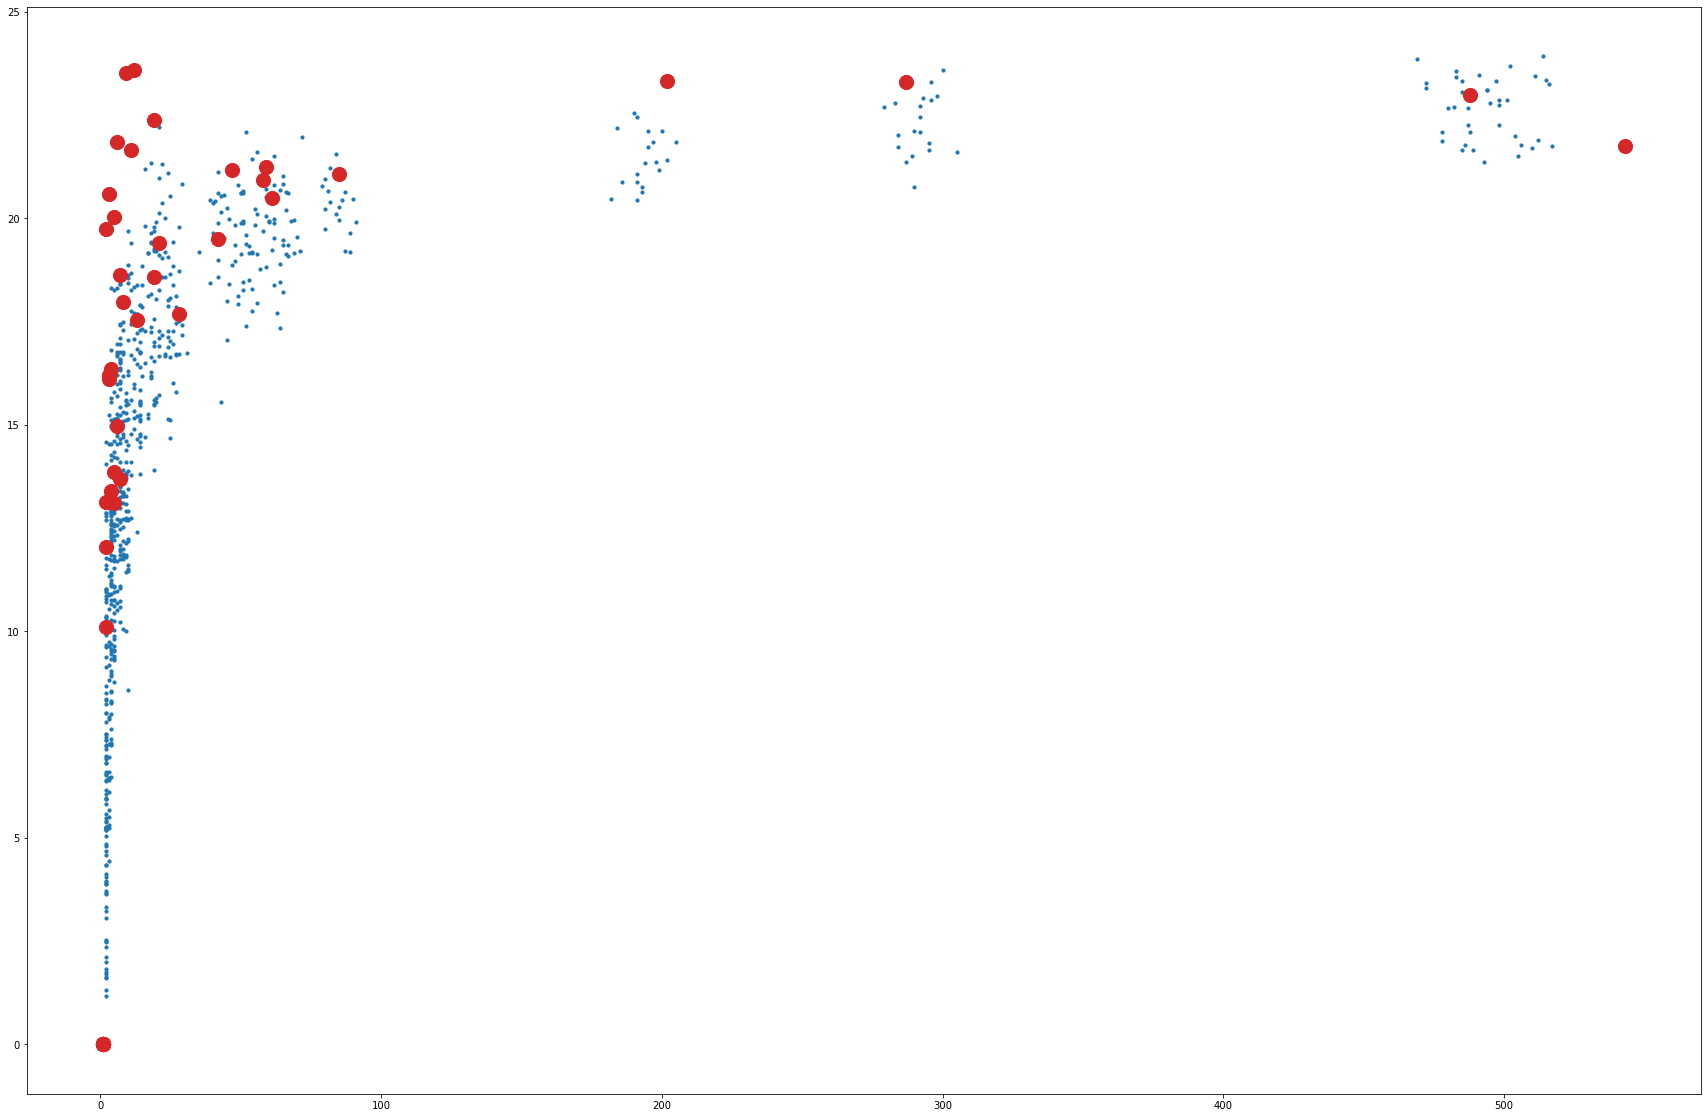

In [13]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (30,20)
sp_limit = 0
for i in range(len(samples)):
    df_filtered = df[(df.Num_of_spc > sp_limit) & (df.Sample_id == samples[i])]
    n_sp_sorted = np.argsort(df_filtered.Num_of_spc.values)
    if i < len(samples) - 1:
        plt.scatter(x=df_filtered.Num_of_spc.iloc[n_sp_sorted], y=df_filtered.Average_distance.iloc[n_sp_sorted], alpha=1., s=10, color='tab:blue')
    else:
        plt.scatter(x=df_filtered.Num_of_spc.iloc[n_sp_sorted], y=df_filtered.Average_distance.iloc[n_sp_sorted], alpha=1., s=20, color='tab:red', zorder=10)